# 2.1) 나무위키 최신 변경 문서의 키워드 분석

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

In [2]:
!pip install selenium beautifulsoup4
# 그대로 실행하니 
# C:\Users\시형\AppData\Local\Temp\ipykernel_14648\3163842747.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
# driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows가 나타났음

# 해결방법 1 : 위와 같이 구버전 selenium을 설치
# 해결방법 2 : selenium 최신버전에 맞춰 코드 새로 짜기
# 관련 url : https://yeko90.tistory.com/entry/%EC%85%80%EB%A0%88%EB%8B%88%EC%9B%80-%EA%B8%B0%EC%B4%88-executablepath-has-been-deprecated-please-pass-in-a-Service-object-%EC%97%90%EB%9F%AC-%ED%95%B4%EA%B2%B0-%EB%B0%A9%EB%B2%95
# ! pip install webdriver_manager

In [3]:
# import time
# from selenium import webdriver

# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager

-----

In [4]:
import os # 패지키 로드
os.getcwd() # 현재 위치
set_path = 'C:/python'
os.chdir(set_path) # 절대 경로 설정

### 셀레니움으로 브라우저 열기

In [5]:
from selenium import webdriver # 드라이버 불러오기
from bs4 import BeautifulSoup
import re

# 1. 윈도우용 크롬 웹드라이버 실행 경로 (Windows)
excutable_path = "chromedriver.exe"
# 만약 크롬드라이버를 노트북경로랑 같은 곳에 두었다면 굳이 지정하지 않아도 됨!

# 2. 크롤링할 사이트 주소를 정의.
url = "https://namu.wiki/RecentChanges"

# 3. 사이트의 html 구조에 기반하여 크롤링을 수행.
driver = webdriver.Chrome(executable_path=excutable_path)

# 4. url 접근
driver.get(url)

### 자동화 방법

In [6]:
# ctrl + shift + I 를 이용하여 url 정보 사전에 확인하기

In [6]:
# 브라우저에 보이는 그대로의 html
req = driver.page_source

# BeautifulSoup(open("index.html"),"html.parser")
# "html.parser" : BeautifuㅣSoup 객체에게 "Html을 분석하라"고 명령
# 안 써도 상관은 없음
soup = BeautifulSoup(req, "html.parser") 

# soup.find(name, attrs, recursive, string, **kwargs)
# name : (태그의) 이름, attrs : 속성, .. (https://homubee.tistory.com/20 에서 확인)
# soup.find("p") : 처음 등장하는 p 태그 찾기
# soup.find_all("p") : 모든 p 태그 찾기
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

# find로 얻은 결과도 BeautifulSoup의 객체가 될 수 있음.
# 그래서 find를 한 결과에 또 find를 적용할 수 있다.
# 가령, table_rows = soup.find(name="table").find(name="tbody").find("tr")

In [7]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = [] # 크롤링 페이지 리스트 생성
for index in range(0, 10):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get("href")
        if "png" not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

https://namu.wiki/w/%EC%9A%B0%EC%9E%A5%EC%82%B0%20%ED%9E%90%EC%8A%A4%ED%85%8C%EC%9D%B4%ED%8A%B8
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EC%86%8C%EB%85%80%EB%A6%AC%EB%B2%84%EC%8A%A4%EB%B0%94%EB%A6%BC.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EC%86%8C%EB%85%80%EB%A6%AC%EB%B2%84%EC%8A%A4%EC%8B%9C%EA%B3%84%EB%8A%94%EC%99%80%EC%B9%98.jpg
https://namu.wiki/w/%EB%8B%A4%ED%9D%91
https://namu.wiki/w/KBL%20%EC%BB%B5%EB%8C%80%ED%9A%8C/2022%EB%85%84


-----

### 페이지 내 텍스트 구조 확인

문서의 본문과 제목, 텍스트 데이터 가져오기

In [8]:
driver = webdriver.Chrome(executable_path=excutable_path) # 크롤링 수행

driver.get(page_urls[0]) # url 접근

In [9]:
req = driver.page_source # html

soup = BeautifulSoup(req, 'html.parser') # html 분석

contents_table = soup.find(name="div", attrs={"class":"aCNBxUDm"}) # article에서 긁어와라
title = contents_table.find_all('h1')[0] # h1 태그 찾아서 첫 번째 거 불러오기
category = contents_table.find_all('ul')[0] # ul 태그 찾아서 첫 번째 거 불러오기
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"upwzFoAB"})
# 클래스 찾아내기

# <h1 title = "Picture"> 그림책 </h1>이라고 써 있다면 태그는 h1, attribute 값은 Picture

In [10]:
# 크롤링 할 페이지의 리스트 만들기
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text) # 제목 정보
print("\n")
print(category.text) # 카테고리
print("\n")
print(content_corpus) # 본문

우장산 힐스테이트 


강서구(서울)의 공동주택나무위키 공동주택 프로젝트대단지 아파트


서울특별시공동주택서울특별시공동주택 [ 펼치기 · 접기 ]자치구강남구강동구강북구강서구관악구광진구구로구금천구노원구도봉구동대문구동작구마포구서대문구서초구성동구성북구송파구양천구영등포구용산구은평구종로구중구중랑구자치구강남구강동구강북구강서구관악구광진구구로구금천구노원구도봉구동대문구동작구마포구서대문구서초구성동구성북구송파구양천구영등포구용산구은평구종로구중구중랑구단지 전경명칭우장산 힐스테이트영문 명칭Ujangsan HILLSTATE종류아파트브랜드주소서울특별시 강서구 강서로 348 (내발산동)입주2005년 5월동수40개동, 101동 ~140동층수지하 2층, 지상 15~21층세대수2,198세대 면적79㎡, 109㎡, 112㎡, 132㎡, 158㎡시공사ㅤㅤ주차대수2,780대 (세대당 1.26대)전기차 충전시설 유무존재상가동측, 서측 2개동1. 개요2. 특징 및 시설2.1. 주민시설2.2. 상업시설3. 주변환경3.1. 교통3.1.1. 지하철역3.1.2. 버스4. 관련항목서울특별시 강서구 강서로 348(舊 내발산동 657)에 위치한 규모 2198세대 면적 79.32제곱미터~158.65제곱미터로 총 40개동, 101~140동으로, 각 동은 보통 3개의 라인으로 구성되어 있다. 서울에 몇 안되는 지하철 초역세권에 전체 평지로 이루어진 대단지 아파트다.지난 2002년 구 내발산 주공아파트와 대한항공 사원아파트(KAL 아파트) 세은아파트, 세림아파트를 재건축하여 2005년 4월에 준공되었다.2005년 '우장산현대홈타운'으로 입주하여 현대힐스테이트 브랜드가 도입된 후 2009년 '우장산 힐스테이트'로 변경되었다.발산역 5, 6번출구에서 앞단지 기준 도보로 약 3분 소요되며, LG사이언스파크 융복합 연구소를 포함한 마곡지구가 도보 10분거리에 인접하고 있다. 발산역 사거리에 바로 붙어 있어 새로 조성된 마곡으로 걸어가기도 매우 쉽다는 점을 주목할 필요가 있다. 심지어 평지[1]인데다 마곡-발산사거리에 웬만한 편의시

In [11]:
# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

-----

### 나무위키 최근변경 데이터 크롤링

In [2]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

NameError: name 'pd' is not defined

In [3]:
# 데이터프레임 만들기
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    driver = webdriver.Chrome(executable_path=excutable_path)
    driver.get(page_url) # url 접근
    
    req = driver.page_source # html
    soup = BeautifulSoup(req, "html.parser") # html 분석
    contents_table = soup.find(name="div", attrs={"class":"aCNBxUDm"}) # article 이름 불러오기
    title = contents_table.find_all("h1")[0] # h1 tag에 해당하는 attribute 값 가져오기
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0:
        category = contents_table.find_all("ul")[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"upwzFoAB"})
    content_corpus_list = []
    
    # 페이지 내 "제목" 정보에서 개행 문자를 제거한 뒤 추출합니다.
    # 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ") # 줄바꿈 >>> 빈칸으로 대체
    else:
        row_title = ""
    
    # 페이지 내 "본문" 정보에서 개행 문자를 제거한 뒤 추출합니다. 
    # 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 
    # 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

NameError: name 'page_urls' is not defined

In [14]:
# 데이터 프레임을 출력합니다.
df.head(5)

,title,category,content_text
0,우장산 힐스테이트,강서구(서울)의 공동주택나무위키 공동주택 프로젝트대단지 아파트,서울특별시공동주택서울특별시공동주택 [ 펼치기 · 접기 ]자치구강남구강동구강북구강서구...
1,파일:소녀리버스바림.jpg,파일/아이돌/버츄얼파일/버츄얼 유튜버/프로필,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
2,파일:소녀리버스시계는와치.jpg,파일/아이돌/버츄얼파일/버츄얼 유튜버/프로필,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
3,다흑,1991년 출생유튜버애완동물 유튜버나무위키 인터넷 방송인 프로젝트,"다흑이름다흑본명김주식성별남성생일1991년 12월 1일 (30세)혈액형O형직업브리더,..."
4,KBL 컵대회/2022년,KBL 컵대회한국프로농구/2022-23 시즌,상위 문서: KBL 컵대회 KBL 컵대회20202021 202220232024...


-----

# <Step2. 추출> : 키워드 추출

### 텍스트 데이터 전처리

특수문자나 외국어를 제거

In [15]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text) # a.sub("찾을 패턴","대체할 문자")
    return result

In [16]:
print(text_cleaning(df['content_text'][0]))

서울특별시공동주택서울특별시공동주택  펼치기  접기 자치구강남구강동구강북구강서구관악구광진구구로구금천구노원구도봉구동대문구동작구마포구서대문구서초구성동구성북구송파구양천구영등포구용산구은평구종로구중구중랑구자치구강남구강동구강북구강서구관악구광진구구로구금천구노원구도봉구동대문구동작구마포구서대문구서초구성동구성북구송파구양천구영등포구용산구은평구종로구중구중랑구단지 전경명칭우장산 힐스테이트영문 명칭 종류아파트브랜드주소서울특별시 강서구 강서로  내발산동입주년 월동수개동 동 동층수지하 층 지상 층세대수세대 면적    시공사주차대수대 세대당 대전기차 충전시설 유무존재상가동측 서측 개동 개요 특징 및 시설 주민시설 상업시설 주변환경 교통 지하철역 버스 관련항목서울특별시 강서구 강서로  내발산동 에 위치한 규모 세대 면적 제곱미터제곱미터로 총 개동 동으로 각 동은 보통 개의 라인으로 구성되어 있다 서울에 몇 안되는 지하철 초역세권에 전체 평지로 이루어진 대단지 아파트다지난 년 구 내발산 주공아파트와 대한항공 사원아파트 아파트 세은아파트 세림아파트를 재건축하여 년 월에 준공되었다년 우장산현대홈타운으로 입주하여 현대힐스테이트 브랜드가 도입된 후 년 우장산 힐스테이트로 변경되었다발산역  번출구에서 앞단지 기준 도보로 약 분 소요되며 사이언스파크 융복합 연구소를 포함한 마곡지구가 도보 분거리에 인접하고 있다 발산역 사거리에 바로 붙어 있어 새로 조성된 마곡으로 걸어가기도 매우 쉽다는 점을 주목할 필요가 있다 심지어 평지인데다 마곡발산사거리에 웬만한 편의시설들이 대거 있기에 생활하기에 매우 편리하다 메가박스와도 가깝고 심지어는 그룹의 아트센터까지 곁에 두고 있다단지의 서측 상가쪽 길 건너편에 서울가곡초등학교 명덕중고교 명덕외국어고등학교 이대서울병원 및 의과대학이 붙어 있으며 미즈메디병원 웰튼병원 힘찬병원 강서송도병원 등 다양한 중형병원 또한 도보권에 있어 진정한 병세권이다 가장 멀리 떨어진 아파트에서조차 이대서울병원이 크게 보일 정도로 무척 가깝다 물론 아파트 소속 상가에도 한의원 치과 개 이비인후과 등

모든 데이터에 전처리 적용 .. appply()

In [17]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,우장산 힐스테이트,강서구서울의 공동주택나무위키 공동주택 프로젝트대단지 아파트,서울특별시공동주택서울특별시공동주택 펼치기 접기 자치구강남구강동구강북구강서구관악구...
1,파일소녀리버스바림,파일아이돌버츄얼파일버츄얼 유튜버프로필,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
2,파일소녀리버스시계는와치,파일아이돌버츄얼파일버츄얼 유튜버프로필,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
3,다흑,년 출생유튜버애완동물 유튜버나무위키 인터넷 방송인 프로젝트,다흑이름다흑본명김주식성별남성생일년 월 일 세혈액형형직업브리더 유튜버가족어머니 누나배...
4,컵대회년,컵대회한국프로농구 시즌,상위 문서 컵대회 컵대회 새마을금고 컵대회기간 년 월 일 월 일 참가팀...


In [ ]:
# 한글을 제외한 모든 문자들이 제거

-----

### 말뭉치(명사, 혹은 형태소 단위의 문자열 추출) 만들기

In [18]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

우장산 힐스테이트 파일소녀리버스바림 파일소녀리버스시계는와치 다흑  컵대회년 파일소녀리버스예니콜 리그 오브 레전드아이템장화 키키링   괴수 목록 


In [30]:
# tolist로 추출 후, join으로 말뭉치 생성

-----

### konlpy를 이용한 키워드(형태소) 추출

In [31]:
!pip install konlpy

In [19]:
from konlpy.tag import Okt
nouns_tagger = Okt() 
nouns = nouns_tagger.nouns(content_corpus) # 본문에서 명사 추출

from collections import Counter # 각 문자가 문자열에서 몇 번 나타나는지를 딕셔너리 형태로 알려줌

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.

count = Counter(nouns)

# 자세한 설명은 https://needjarvis.tistory.com/645

In [20]:
count

Counter({'서울특별시': 7,
         '주택': 3,
         '접기': 18,
         '자치구': 2,
         '강남구': 2,
         '강동구': 2,
         '강북구': 2,
         '강서구': 5,
         '관악구': 2,
         '광진구': 2,
         '구로구': 2,
         '금천구': 2,
         '노원구': 2,
         '도봉구': 2,
         '동대문구': 2,
         '동작구': 2,
         '마포구': 2,
         '서대문구': 2,
         '서초구': 2,
         '성동구': 2,
         '성북구': 2,
         '송파구': 2,
         '양천구': 2,
         '영등포구': 2,
         '용산구': 2,
         '은평구': 2,
         '종로구': 2,
         '중구': 2,
         '중랑구': 2,
         '단지': 33,
         '명칭': 9,
         '우장산': 17,
         '힐스테이트': 8,
         '영문': 1,
         '종류': 3,
         '아파트': 25,
         '브랜드': 9,
         '주소': 1,
         '강서': 20,
         '내발산동': 3,
         '입': 9,
         '주년': 8,
         '월': 68,
         '동수': 1,
         '층': 8,
         '지하': 9,
         '지상': 49,
         '세대': 11,
         '면적': 2,
         '시공사': 1,
         '주차': 1,
         '대수': 1,
         '전기차': 1,


In [21]:
print(nouns)

['서울특별시', '주택', '서울특별시', '주택', '접기', '자치구', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '자치구', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '단지', '명칭', '우장산', '힐스테이트', '영문', '명칭', '종류', '아파트', '브랜드', '주소', '서울특별시', '강서구', '강서', '내발산동', '입', '주년', '월', '동수', '층', '지하', '층', '지상', '층', '세대', '면적', '시공사', '주차', '대수', '세대', '전기차', '충전', '시설', '유무', '존재', '가동', '서측', '개', '개요', '특징', '및', '시설', '주민', '시설', '상업시설', '주변', '환경', '교통', '지하철역', '버스', '관련', '항목', '서울특별시', '강서구', '강서', '내발산동', '위치', '규모', '세대', '면적', '제곱미터', '제곱미터', '총', '개', '동', '각', '은', '보통', '개', '라인', '구성', '서울', '몇', '지하철', '초', '권', '전체', '평지', '단지', '아파트', '지난', '년', '구', '발산', '아파트', '대한항공', '사원', '아파트', '아파트', '아파트', '림', '아파트', '재건축', '년', '월', '준공', '다년', '우

-----

### 키워드 가다듬기

##### 한글자 키워드 제거

In [22]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
# 한 글자 보다 큰 문자 : 갯수
print(remove_char_counter)

Counter({'괴수': 763, '공격': 570, '속도': 295, '체력': 290, '문서': 284, '이전': 282, '문단': 278, '역사': 261, '때문': 233, '고지라': 232, '매우': 219, '고질라': 212, '스킬': 198, '대미지': 180, '게임': 165, '범위': 145, '정도': 144, '레벨': 135, '사용': 126, '상대': 126, '열선': 126, '유저': 116, '모션': 115, '가격': 114, '붕괴': 113, '경우': 111, '기술': 109, '기력': 105, '토론': 104, '사항': 103, '다른': 102, '컨트롤': 102, '합의': 102, '모델': 102, '또한': 101, '공중': 94, '성능': 85, '방어': 85, '시간': 82, '하나': 82, '설명': 82, '데미지': 82, '원거리': 81, '회복': 81, '메카': 78, '등장': 77, '히트': 77, '가장': 75, '이름': 75, '모습': 74, '수영': 74, '몬스터': 73, '장화': 72, '티밍': 72, '판정': 71, '박스': 71, '이후': 70, '너프': 70, '스텀': 70, '대미': 69, '헤이세이': 66, '이동': 65, '기본': 65, '무려': 64, '제로': 64, '울티마': 64, '사실': 61, '장단점': 60, '추가': 60, '기도': 60, '여담': 58, '출시': 58, '스탯': 58, '현재': 57, '아이템': 57, '걷기': 57, '모델링': 55, '모든': 55, '대신': 54, '달리기': 54, '지번': 54, '크레딧': 54, '데스': 53, '금지': 53, '거의': 52, '과거': 52, '쿨타임': 52, '게다가': 52, '라스': 52, '모스': 52, '몬제': 52, '전용': 51, '존재': 50, '편이': 50,

-----

##### 불용어 제거

실질적인 의미가 없는 키워드 처리

In [23]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "C:\\Users\\시형\\Desktop\\DataAnalysis\\python-data-analysis-master\\data\\korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords] # a.strip() : 공백 제거
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [24]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [25]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'괴수': 763, '공격': 570, '속도': 295, '체력': 290, '이전': 282, '문단': 278, '역사': 261, '고지라': 232, '고질라': 212, '스킬': 198, '대미지': 180, '게임': 165, '범위': 145, '레벨': 135, '상대': 126, '열선': 126, '유저': 116, '모션': 115, '가격': 114, '붕괴': 113, '기술': 109, '기력': 105, '토론': 104, '사항': 103, '컨트롤': 102, '합의': 102, '모델': 102, '공중': 94, '성능': 85, '방어': 85, '데미지': 82, '원거리': 81, '회복': 81, '메카': 78, '등장': 77, '히트': 77, '수영': 74, '몬스터': 73, '장화': 72, '티밍': 72, '판정': 71, '박스': 71, '너프': 70, '스텀': 70, '대미': 69, '헤이세이': 66, '이동': 65, '기본': 65, '무려': 64, '제로': 64, '울티마': 64, '장단점': 60, '기도': 60, '여담': 58, '출시': 58, '스탯': 58, '현재': 57, '아이템': 57, '걷기': 57, '모델링': 55, '대신': 54, '달리기': 54, '지번': 54, '크레딧': 54, '데스': 53, '금지': 53, '과거': 52, '쿨타임': 52, '라스': 52, '모스': 52, '몬제': 52, '전용': 51, '존재': 50, '편이': 50, '영화': 50, '지상': 49, '비행': 49, '미사일': 49, '대부분': 48, '버프': 48, '이벤트': 48, '만렙': 47, '단점': 47, '이미지': 46, '캐릭터': 46, '근접': 45, '거리': 44, '은근': 44, '전투': 44, '효과': 44, '라돈': 44, '머리': 43, '파밍': 43, '효율': 42, '증가

-----

# <Step3. 시각화> : 워드 클라우드 시각화

### [pytagcloud 사용하기]

In [26]:
!pip install pytagcloud pygame simplejson

In [27]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

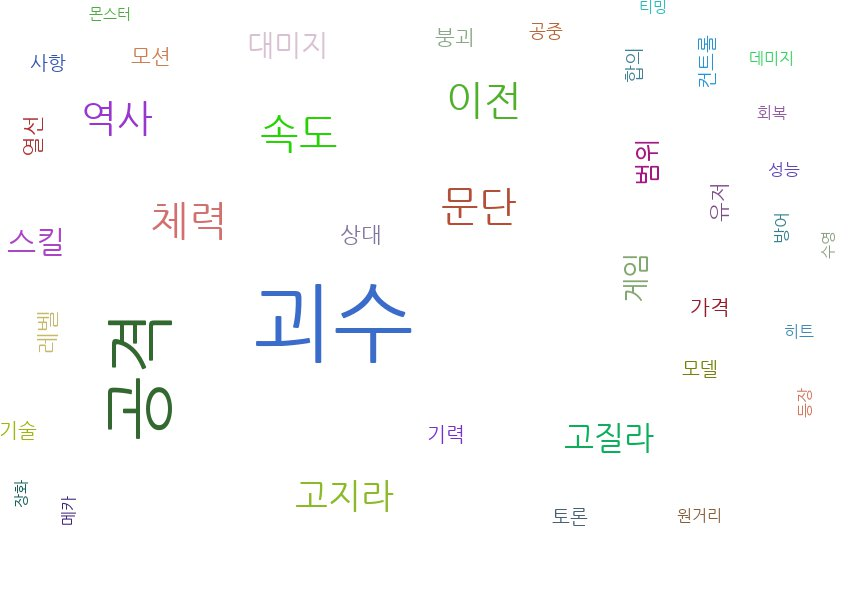

In [28]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')

-----

### 나무위키 키워드 시각화

##### 제목 키워드

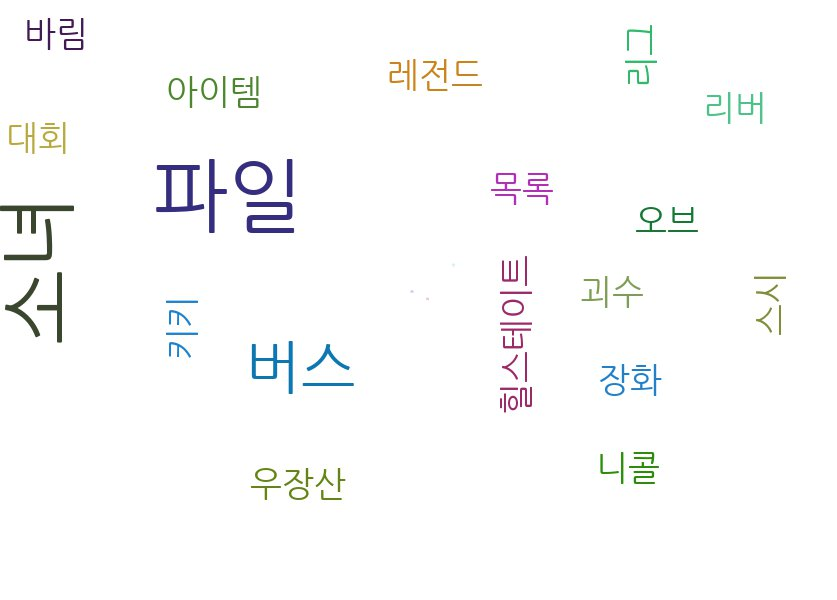

In [29]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

-----

##### 카테고리 키워드

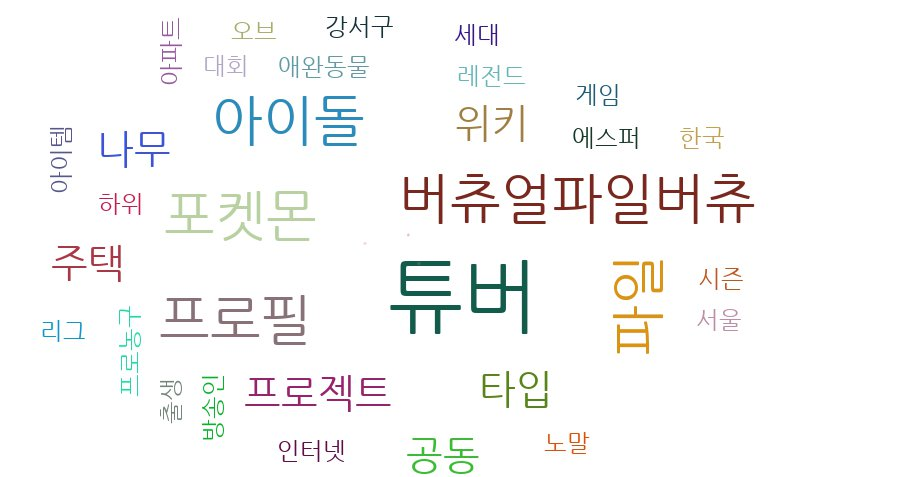

In [30]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='category_wordcloud.jpg')